In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def bar_plot(title, labels, training_means):

    x = np.arange(len(labels))  # the label locations
    width = 0.5  # the width of the bars

    fig, ax = plt.subplots(figsize=(8, 6))
    bar = ax.bar(x, training_means, width, label='Testing')
    y_pos = range(len(labels))
    plt.xticks(y_pos, labels, rotation=90)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('RMSE')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    for rect in bar:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.0, height, f'{height:.3f}', ha='center', va='bottom')

    fig.tight_layout()
    #plt.savefig(your_path + title + "-all.pdf", bbox_inches='tight')
    #plt.ylim(0,55)
    #plt.savefig(your_path + title + "-ylim.pdf", bbox_inches='tight')

    plt.show()

In [2]:
data = pd.read_csv("../results/results_prediction_impact.csv")
data


,dataset,model,dimension,rmse
0,abalone,DecisionTree,completeness,0.094359
1,abalone,DecisionTree,accuracy,0.050002
2,abalone,LogisticRegression,completeness,0.060813
3,abalone,LogisticRegression,accuracy,0.049275
4,abalone,KNN,completeness,0.047605
...,...,...,...,...
325,wall-robot-navigation,RandomForest,accuracy,0.087390
326,wall-robot-navigation,AdaBoost,completeness,0.100547
327,wall-robot-navigation,AdaBoost,accuracy,0.180835
328,wall-robot-navigation,SVC,completeness,0.485545


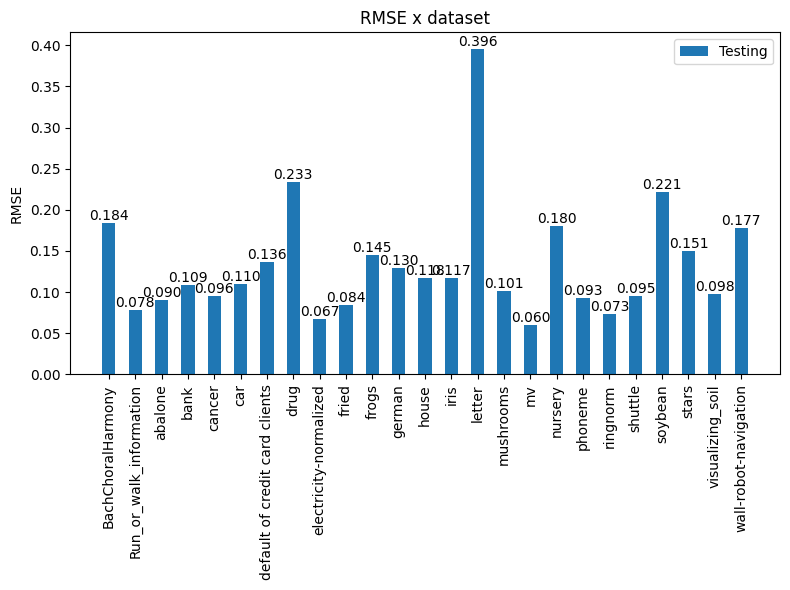

In [3]:
### performance per dataset
df = data[['dataset','rmse']].groupby(['dataset']).mean().reset_index().copy()
bar_plot("RMSE x dataset",df.dataset.unique(),df.rmse)

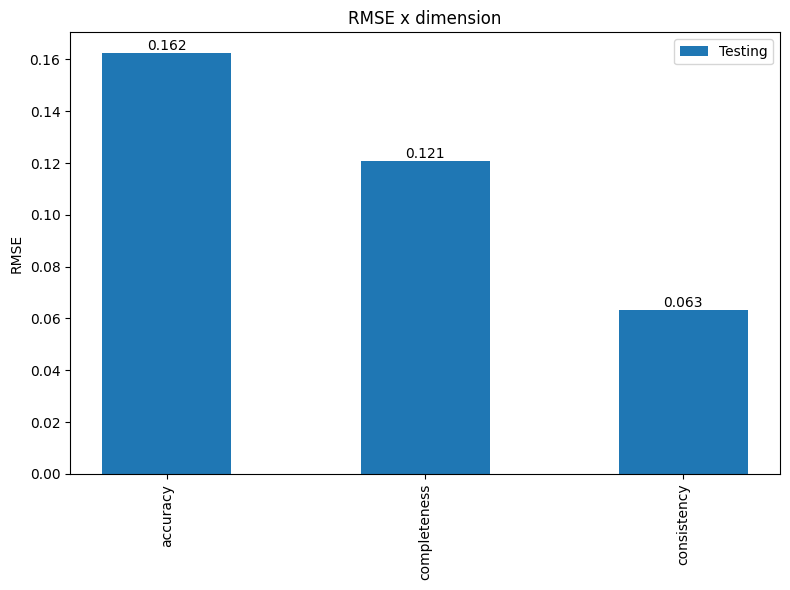

In [4]:
### performance per dimensione
df = data[['dimension','rmse']].groupby(['dimension']).mean().reset_index().copy()
bar_plot("RMSE x dimension",df.dimension.unique(),df.rmse)

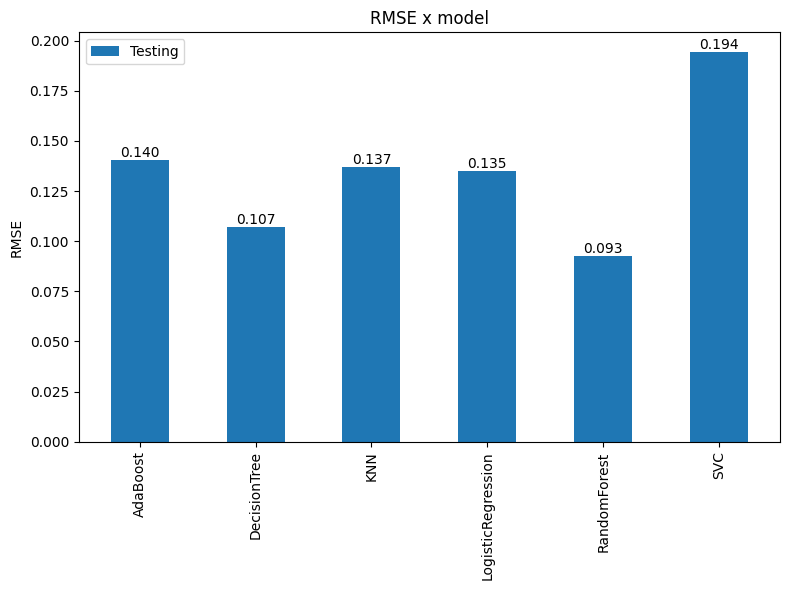

In [5]:
### performance per dimensione
df = data[['model','rmse']].groupby(['model']).mean().reset_index().copy()
bar_plot("RMSE x model",df.model.unique(),df.rmse)


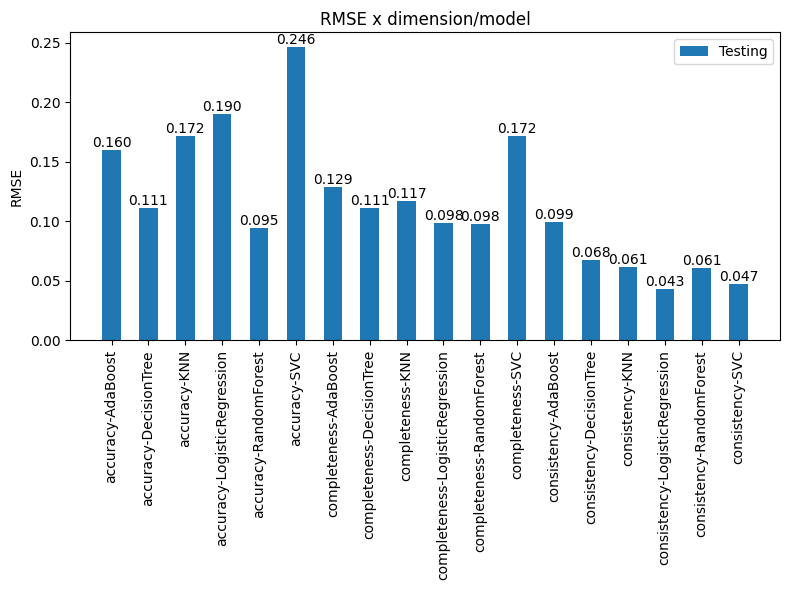

In [6]:
### performance per dimensione e modello
labels = []
for dimension in np.sort(data.dimension.unique()):
    for model in np.sort(data.model.unique()):
        labels.append(dimension+"-"+model)

df = data[['dimension','model','rmse']].groupby(['dimension','model']).mean().reset_index().copy()
bar_plot("RMSE x dimension/model",labels,df.rmse)

In [7]:
len(data[data.rmse < 0.10])/len(data)


0.5212121212121212

In [8]:
len(data[data.rmse < 0.15])/len(data)


0.6575757575757576

In [9]:
len(data[data.rmse < 0.20])/len(data)


0.7909090909090909

In [10]:
len(data[data.rmse < 0.30])/len(data)


0.9181818181818182

In [11]:
data.rmse.mean()


np.float64(0.1344474223217409)

In [12]:
np.median(data.rmse)


np.float64(0.09571899888518079)